#Importando as bibliotecas

Como o ambiente utilizado é o Google Colab, foi necessaria a instalação de Geopandas, Geopy e Kaleido para exportar as imagens geradas pelo Plotly.

In [ ]:
!pip install geopandas
!pip install geopy
!pip install -U kaleido

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import geopy
import geopandas as gpds

##Descrição da base de dados:


*   **Address:** endereço dos imóveis
*   **Adm-fess :** taxa de condomínio dos imóveis


*   **Garage-places:** número de vagas de garagem
*   **Price:** A variável alvo dessa análise. É referente ao preço dos imóveis.


*   **Rooms:** Número de quartos dos imóveis.


*   **City:** Cidade em que o imóvel é pertencente
*   **Latitude e Longitude:** local em coordenadas onde o imóvel se localiza.











#Importanto os dados

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/base_de_dados/data_housing_price_BH.csv')

In [ ]:
dados.head()

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944


#Tratamento dos dados faltantes

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        5981 non-null   object 
 1   adm-fees       3977 non-null   float64
 2   garage-places  5981 non-null   object 
 3   price          5951 non-null   float64
 4   rooms          5981 non-null   object 
 5   square-foot    5981 non-null   object 
 6   neighborhood   5957 non-null   object 
 7   city           5981 non-null   object 
 8   latitude       5981 non-null   float64
 9   longitude      5981 non-null   float64
dtypes: float64(4), object(6)
memory usage: 467.4+ KB


In [ ]:
dados.isna().sum()

address             0
adm-fees         2004
garage-places       0
price              30
rooms               0
square-foot         0
neighborhood       24
city                0
latitude            0
longitude           0
dtype: int64

Foi retirado da análise a coluna "adm-fees" devido ao alto número de dados faltantes. Os dados faltantes da coluna "price" foi substituido pela sua mediana e utilizei a biblioteca "Geopandas" para conseguir os endereços faltantes da coluna "neighborhood".

In [ ]:
dados = dados.drop('adm-fees', axis = 1)

In [ ]:
dados.price.fillna(dados.price.median(), inplace = True)

In [ ]:
dados[dados['neighborhood'].isna()]

,address,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
43,Rua Flor,1,495000.0,3,68,NaN,Belo Horizonte,-19.833960,-43.868807
68,Rua Flor,2,530000.0,3,81,NaN,Belo Horizonte,-19.833960,-43.868807
353,Rua Flor,2-4,648154.0,3,75,NaN,Belo Horizonte,-19.833960,-43.868807
769,Rua Pium,5,6500.0,4,547,NaN,Belo Horizonte,-19.951487,-43.930124
801,Rua Lírios,4,330000.0,2,70,NaN,Belo Horizonte,-19.979418,-44.171465
1246,Rua Pium,1,790000.0,4,172,NaN,Belo Horizonte,-19.951487,-43.930124
1459,"Nova Vista, Sabará",1,250000.0,2,66,NaN,Belo Horizonte,-19.888777,-43.897505
1591,Rua Lírios,--,330000.0,--,70,NaN,Belo Horizonte,-19.979418,-44.171465
1982,"Vila da Serra, Nova Lima",5,5100000.0,4,421,NaN,Belo Horizonte,-19.980007,-43.941234
2246,Rua Beija,2,480000.0,3,85,NaN,Belo Horizonte,-19.828803,-43.949961


In [ ]:
gpds.tools.geocode(dados[dados['neighborhood'].isna()].address, provider = 'nominatim', user_agent="sample app", country_bias="Brazil", timeout=10).geometry

43      POINT (-48.85070 -21.73668)
68      POINT (-48.85070 -21.73668)
353     POINT (-48.85070 -21.73668)
769     POINT (-46.52126 -23.57160)
801     POINT (-49.32136 -16.61621)
1246    POINT (-46.52126 -23.57160)
1459    POINT (-43.90052 -19.87952)
1591    POINT (-49.32136 -16.61621)
1982    POINT (-43.94123 -19.98001)
2246    POINT (-46.70156 -23.32998)
2440    POINT (-48.85070 -21.73668)
2464    POINT (-46.52126 -23.57160)
3408    POINT (-48.85070 -21.73668)
3486    POINT (-46.52126 -23.57160)
3565    POINT (-48.85070 -21.73668)
3630    POINT (-46.52126 -23.57160)
4064    POINT (-46.52126 -23.57160)
4373    POINT (-46.52126 -23.57160)
4716    POINT (-46.52126 -23.57160)
4726    POINT (-43.94123 -19.98001)
4945    POINT (-46.52126 -23.57160)
5257    POINT (-46.52126 -23.57160)
5592    POINT (-46.52126 -23.57160)
5771    POINT (-46.52126 -23.57160)
Name: geometry, dtype: geometry

In [ ]:
points = gpds.points_from_xy(dados[dados['neighborhood'].isna()].longitude, dados[dados['neighborhood'].isna()].latitude)

Foi criado um novo DataFrame para receber os endereços faltantes:

In [ ]:
df_missing_address = gpds.tools.reverse_geocode(points, provider='nominatim')

/usr/local/lib/python3.8/dist-packages/geopy/geocoders/osm.py:132: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  warnings.warn(


In [ ]:
df_missing_address.head()

,geometry,address
0,POINT (-43.86881 -19.83396),"Beco João Pinheiro Ii, Beija-Flor, Beija Flor,..."
1,POINT (-43.86881 -19.83396),"Beco João Pinheiro Ii, Beija-Flor, Beija Flor,..."
2,POINT (-43.86881 -19.83396),"Beco João Pinheiro Ii, Beija-Flor, Beija Flor,..."
3,POINT (-43.93012 -19.95149),"Rua São João Da Ponte, Sion, Regional Centro-S..."
4,POINT (-44.17147 -19.97942),"Rua Lírios, Monte Verde, Regional Centro, Beti..."


Foi também retirado os espaços (' ') contidos nos endereços importados e separei apenas os nomes dos bairro adicionando em uma nova coluna:

In [ ]:
df_missing_address['neighborhood'] = df_missing_address.address.str.split(',').str[1].str.strip()

In [ ]:
df_missing_address.head()

,geometry,address,neighborhood
0,POINT (-43.86881 -19.83396),"Beco João Pinheiro Ii, Beija-Flor, Beija Flor,...",Beija-Flor
1,POINT (-43.86881 -19.83396),"Beco João Pinheiro Ii, Beija-Flor, Beija Flor,...",Beija-Flor
2,POINT (-43.86881 -19.83396),"Beco João Pinheiro Ii, Beija-Flor, Beija Flor,...",Beija-Flor
3,POINT (-43.93012 -19.95149),"Rua São João Da Ponte, Sion, Regional Centro-S...",Sion
4,POINT (-44.17147 -19.97942),"Rua Lírios, Monte Verde, Regional Centro, Beti...",Monte Verde


Os valores nulos do DataFrame principal 'dados' foram substituidos pelos bairros contidos em 'df_missing_address'. No outro código pode-se confirmar que não há mais endereços faltantes.

In [ ]:
dados.loc[dados['neighborhood'].isna(),'neighborhood'] = df_missing_address['neighborhood'].values

In [ ]:
dados['neighborhood'].isna().sum()

0

##Limpeza e substuição de caracteres
As colunas 'neighborhood, 'city', "garage-places", "square-foot" e "rooms" contém caracteres inapropriados para sua utilização.

Para as colunas "neighborhood" e "city" temos que tirar os espaços em brancos nas extremidades das "strings":

In [ ]:
dados['neighborhood'].unique()[:10]

array([' Luxemburgo', ' Centro', ' Santa Amélia', ' Gutierrez',
       ' Pindorama', ' Castelo', ' Santo Antônio', ' Sagrada Família',
       ' Sion', ' Lourdes'], dtype=object)

In [ ]:
dados.city.unique()

array([' Belo Horizonte ', 'Belo Horizonte', ' Nova Lima ', ' Contagem ',
       ' Ribeirão das Neves ', ' Santa Luzia ', ' Betim ',
       ' Lagoa Santa ', ' Km 480 ', ' Divinópolis ', ' 1122 ', ' Sabará ',
       ' 461 ', ' 1542 ', ' 570 ', ' 1601 ', ' São Paulo ', ' 22 ',
       ' 31 '], dtype=object)

In [ ]:
dados['neighborhood'] = dados['neighborhood'].str.strip()
dados['city'] = dados.city.str.strip()

Como pode-se observar as colunas "garage-places" e "square-foot" contém os caracteres "--" e números como por exemplo "60-71". O primeiro foi substituído por "0" e o segundo pela média dos dois números presentes no intervalo. Para efetuar esses dois processos foi criado uma função que retorna a lista "clean_data" com os dados tratados.

In [ ]:
dados['garage-places'].unique()

array(['1', '5', '4', '6', '2', '3', '2-3', '--', '1-2', '10', '13',
       '3-4', '7', '2-4', '1-3', '8', '20', '9', '50', '18', '28', '12',
       '15', '25', '40', '22', '11', '46', '19', '17'], dtype=object)

In [ ]:
dados['square-foot'].unique()[:30]

array(['40', '45-65', '411', '158', '278', '87', '60-71', '153', '200',
       '570', '74', '72', '250', '62-65', '102', '52', '160', '215', '82',
       '90', '54', '127', '140', '178', '254', '123', '96', '55', '115',
       '120'], dtype=object)

In [ ]:
def swap_character(name_column):
  clean_data = list()
  for i in dados[name_column]:
      if i.find('--') != -1:
         clean_data.append(i.replace("--", '0'))
      elif i.find('-') != -1:
        clean_data.append(i.replace(i, str((int(i[:i.find('-')]) + int(i[i.find('-') + 1:]))/2)))
      else: clean_data.append(i)
  return clean_data
      



In [ ]:
dados.loc[:, 'garage-places'] = swap_character('garage-places')
dados.loc[:, 'square-foot']= swap_character('square-foot')


Pode-se confirmar que os dados foram tratados:

In [ ]:
dados['garage-places'].value_counts()

2      2235
1      1458
3       830
4       576
0       553
5       113
6        85
8        31
10       25
7        17
2.5      10
3.5       9
1.5       7
11        5
13        4
15        4
20        3
46        2
9         2
12        2
40        1
19        1
22        1
18        1
25        1
28        1
50        1
2.0       1
3.0       1
17        1
Name: garage-places, dtype: int64

In [ ]:
dados['square-foot'].value_counts()

90      130
70      128
140     122
80      116
60      112
       ... 
680       1
365       1
2399      1
1114      1
307       1
Name: square-foot, Length: 613, dtype: int64

Para a coluna "rooms" foi decidido retirar as linhas que contém "--", já que é improvável que tenha um imóvel com o valor nulo de quartos. Em seguida foi aplicada a função de criada de substituição "swap_character()".

In [ ]:
dados.rooms.unique()

array(['1', '2', '4', '3', '5', '--', '2-3', '1-2', '3-4', '18', '8', '6',
       '12', '13', '7', '9', '16', '4-5', '45', '50', '10', '15'],
      dtype=object)

In [ ]:
dados = dados.query('rooms != "--"').copy()
dados.loc[:, 'rooms']= swap_character('rooms')

In [ ]:
dados.rooms.unique()

array(['1', '2', '4', '3', '5', '2.5', '1.5', '3.5', '18', '8', '6', '12',
       '13', '7', '9', '16', '4.5', '45', '50', '10', '15'], dtype=object)

In [ ]:
dados.head()

,address,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",1,480000.0,2,55.0,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944


Agora que a limpeza e troca de caracteres foi concluída, foi efetuada a troca do tipo das colunas "númericas" que ainda estão como Dtype "object".

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5477 entries, 0 to 5979
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        5477 non-null   object 
 1   garage-places  5477 non-null   object 
 2   price          5477 non-null   float64
 3   rooms          5477 non-null   object 
 4   square-foot    5477 non-null   object 
 5   neighborhood   5477 non-null   object 
 6   city           5477 non-null   object 
 7   latitude       5477 non-null   float64
 8   longitude      5477 non-null   float64
dtypes: float64(3), object(6)
memory usage: 427.9+ KB


In [ ]:
for i in dados[['garage-places', 'rooms', 'square-foot']].columns:
  dados.loc[:, i] = pd.to_numeric(dados[i])


##Separando os bairros por regiões
Para uma melhor análise foi decidido criar uma nova coluna "zones" contendo as regiões administrativas de cada bairro. Para isso foi preciso adquirir a lista dos bairros pertecentes a cada região.

In [ ]:
dados['zones'] = dados['neighborhood']

In [ ]:
Barreiro = '''Ademar Maldonado
Águas Claras
Alta Tensão
Alta Tensão I
Alto das Antenas
Araguaia
Átila de Paiva
Bairro das Indústrias I
Bonsucesso
Novo das Indústrias
Barreiro
Bernadete
Bonsucesso Barreiro
Brasil Industrial
Cardoso Barreiro
Castanheira
CDI Jatobá
Conjunto Bonsucesso
Conjunto Jatobá
Corumbiara
Diamante
Distrito Industrial do Jatobá
Ernesto do Nascimento
Esperança
Flávio de Oliveira
Flávio Marques Lisboa
Independência
Itaipu Barreiro
Jardim Liberdade
Jardim do Vale
Jatobá
João Paulo II
Lindeia
Mangueiras
Marieta I
Marieta II
Marilândia
Milionários
Mineirão
Miramar
Novo Santa Cecília
Olaria
Olhos D’Água (parte)
Petrópolis
Pilar
Pongelupe
Santa Cecília
Santa Helena
Santa Margarida
Santa Rita
São João
Serra do Curral
Solar do Barreiro
Teixeira Dias
Teixeira Dias Barreiro
Tirol
Túnel de Ibirité
Distrito Industrial Vale do Jatobá
Vale do Jatobá Barreiro
Vale do Jatoba Barreiro
Vila Átila de Paiva
Vila Batik
Vila Cemig
Vila Copasa
Vila Ecológica
Vila Formosa
Vila Independência I
Vila Independência II
Vila Independência III
Vila Independência IV
Vila Mangueiras
Vila Nova dos Milionários
Vila Olhos D’Água
Vila Petrópolis
Vila Pilar
Vila Pinho
Vila Piratininga
Vila Tirol
Vitória da Conquista
'''

In [ ]:
Centro_Sul = '''Anchieta
Barro Preto
Belvedere
Boa Viagem
Carmo
Centro
Cidade Jardim
Conjunto Santa Maria
Coração de Jesus
Cruzeiro
Funcionários
Lourdes
Luxemburgo
Mangabeiras
Santa Lúcia
Santo Agostinho
Santo Antônio
São Bento
São Lucas
São Pedro
Savassi
Serra
Sion
Vila Bandeirantes
Vila Barragem Santa Lúcia
Vila FUMEC
Vila Paris
Comiteco'''

In [ ]:
Leste = '''Alto Vera Cruz
Alto da Boa Vista
Baleia
Belém Primeira Seção
Belém Segunda Seção
Boa Vista
Buraco Quente
Caetano Furquim
Camponesa Primeira Seção
Camponesa Segunda Seção
Casa Branca
Cidade Jardim Taquaril
Colégio Batista
Cônego Pinheiro Primeira Seção
Cônego Pinheiro Segunda Seção
Conjunto Taquaril
Esplanada
Fazendinha
Floresta
Granja De Freitas
Grota
Horto
Horto Florestal
Jardim dos Pirineus
João Alfredo
Jonas Veiga
Mariano de Abreu
Nossa Senhora do Rosário
Nova Vista
Novo São Lucas
Paraíso
Pirineus
Pompéia
Sagrada Família
Santa Efigênia
Santa Inês
Santa Tereza
São Geraldo
São Vicente
Saudade
Taquaril
Vera Cruz
Vila Boa Vista
Vila da Área
Vila Nossa Senhora do Rosário
Vila Novo São Lucas
Vila Paraíso
Vila São Geraldo
Vila São Rafael
Vila União
Vila Vera Cruz Primeira Seção
Vila Vera Cruz Quarta Seção
Vila Vera Cruz Segunda Seção
Vila Vera Cruz Terceira Seção'''

In [ ]:
Nordeste = '''Acaiaca
Andiroba
Antônio Ribeiro de Abreu Primeira Seção
Antônio Ribeiro de Abreu Segunda Seção
Antônio Ribeiro de Abreu Terceira Seção
Beija Flor
Beira-Linha
Bela Vitória
Belmonte
Boa Esperança
Cachoeirinha
Canadá
Capitão Eduardo
Carioca
Cidade Nova
Concórdia
Conjunto Capitão Eduardo
Conjunto Paulo VI
Conjunto Ribeiro de Abreu
Dom Silvério
Eymard
Fernão Dias
Goiânia
Graça
Grotinha
Guanabara
Ipê
Ipiranga
Jardim Vitória
Maria Goretti
Maria Virgínia
Mirtes
Morro dos Macacos
Nazaré
Nossa Senhora da Penha
Nova Floresta
Ouro Minas
Palmares
Paulo VI
Pousada São João Batista
Pirajá
Pousada Santo Antônio
Penha
Renascença
Ribeiro de Abreu
Santa Cruz
Chacaras Del Rey Sao Benedito
São Gabriel
São Marcos
São Paulo
São Sebastião
Silveira
Vila Tiradentes
Três Marias
União
Universitário
Vila da Luz
Vila da Paz
Vila de Sé
Vila do Pombal
Vila Esplanada
Vila Enestan
Vila Ipiranga
Vila Maria
Vila Nova Cachoeirinha Terceira Seção
Vila Ouro Minas
Vila Ozanan
Vila São Gabriel
Vila São Paulo
Vista do Sol
Vitória
Beija-Flor'''

In [ ]:
Noroeste ='''Alípio de Melo
Alto Caiçaras
Alto dos Caiçaras
Alto dos Pinheiros
Álvaro Camargos
Aparecida
Aparecida, Sétima Seção
Bom Jesus
Bonfim
Caiçara-Adelaide
Caiçaras
Califórnia
Camargos
Carlos Prates
Caiçara Adeláide
Conjunto Califórnia
Conjunto Celso Machado
Conjunto Jardim Filadélfia
Coqueiros
Coração Eucarístico
Delta
Dom Bosco
Dom Cabral
Ermelinda
Glória
Inconfidência
Jardim Alvorada
Jardim Incofidência
Jardim Montanhês
Jardim São José
João Pinheiro
Lagoinha
Lorena
Maravilha I
Maravilha II
Marmiteiros
Minas Brasil
Monsenhor Messias
Nova Cachoeirinha
Nova Esperança
Novo Dom Bosco
Novo Glória
Oeste
Padre Eustáquio
Peru
Pindorama
Prado Lopes
Santa Maria
Santo André
São Cristóvão
São Salvador
São Joaquim
Senhor dos Passos
Serrano
Sumaré
Vila Alvorada
Vila Antena Montanhês
Vila Califórnia
Vila Coqueiral
Vila das Oliveiras
Vila Jardim Montanhês
Vila Jardim São José
Vila Maloca
Vila Nova Cachoeirinha I
Vila Nova Cachoeirinha II
Vila Oeste
Vila PUC
Vila Santo Antônio Barroquinha
Vila Sumaré
Vila Trinta e Um de Março'''

In [ ]:
Norte = '''Aarão Reis
Campo Alegre
Canaã
Celestino
Conjunto Floramar
Conjunto Novo Aarão Reis
Conjunto Mariquinhas
Etelvina Carneiro
Felicidade
Floramar
Frei Leopoldo
Guarani
Granja Verde
Heliópolis
Jaqueline
Jardim Guanabara
Juliana
Lajedo
Laranjeiras
Madri
Maria Tereza
Marize
Minaslândia
Minaslandia P Maio
Monte Azul
Novo Aarão Reis
Padre Júlio Maria
Planalto
Primeiro de Maio
Providência
Ribeiro de Abreu
São Bernardo
São Gonçalo
São Tomás
São Tomaz
Satélite
Solimões
Tupi
Vila Aeroporto
Vila Biquinhas
Vila Clóris
Vila Nova
Xodó
Xodó Marize
Zilah Spósito
Santa Amelia
Copacabana'''

In [ ]:
Oeste = '''Alpes
Alto Barroca
Bairro das Indústrias II
Bairro Madre Gertrudes
Barão Homem de Melo I
Barão Homem de Melo II
Barão Homem de Melo III
Barão Homem de Melo IV
Barroca
Betânia
Buritis
Cabana Pai Tomás
Calafate
Camargos
Chácara Leonina
Cinqüentenário
Conjunto Betânia
Estoril
Estrela Dalva
Estrela do Oriente
Gameleira
Grajaú
Guaratã
Glalijá
Gutierrez
Havaí
Imbaúbas
Jardim América
Jardinópolis
Leonina
Madre Gertrudes I, II, III, V e VII
Madre Gertrudes
Marajó
Nova Cintra
Nova Gameleira
Nova Granada
Nova Suíça
Nova Suíssa
Olhos d'Água
Palmeiras
Pantanal
Parque São José
Prado
Salgado Filho
Santa Sofia
São Jorge
Sport Club
Ventosa
Vila Antena
Vila Calafate
Vila Havaí
Vila Nova Gameleira I
Vila Nova Gameleira II
Vila Nova Gameleira III
Vila Nova Paraíso
Vila Oeste
Vila Vista Alegre
Virgínia
Vista Alegre'''

In [ ]:
Venda_Nova = '''Apolônia
Canaã
Candelaria
Cenaculo
Minascaixa
Conjunto Serra Verde
Copacabana
Europa
Evereste
Flamengo
Jardim Ana Lúcia
Jardim dos Comerciários
Jardim Leblon
Jardim Europa venda Nova
Juliana
Lagoa
Kátia
Lagoinha Leblon
Laranjeiras
Letícia
Mantiqueira
Maria Helena
Minas Caixa
Nossa Senhora Aparecida
Nova América
Novo Letícia
Parque São Pedro
Parque Copacabana
Parque Leblon
Parque Pedro II
Parque Sao Pedro Venda Nova
Piratininga
Piratininga Venda Nova
Rio Branco
Santa Mônica
São João Batista
Serra Verde
Sinimbu
Universo
Várzea da Palma
Venda Nova
Vila Canto do Sabiá
Vila Copacabana
Vila dos Anjos
Vila Jardim Leblon
Vila Mantiqueira
Vila Piratininga Venda Nova
Vila Santa Branca Primeira Seção
Vila Santa Branca Segunda Seção
Vila São João Batista
Vila Satélite
Vila SESC
Visconde do Rio Branco'''

In [ ]:
Pampulha = '''Aeroporto
Aglomerado São Tomás/São Bernardo
Bandeirantes
Braúnas
Campus Pampulha da UFMG
Castelo
Céu Azul
Confisco Conjunto da Lagoa
Copacabana I
Dona Clara
Engenho Nogueira
Garças
Inestan
Itapoã
Itatiaia
Jaraguá
Jardim Atlântico
Jardim Paqueta
Liberdade
Manacás
Nova Pampulha
Novo Ouro Preto
Ouro Preto
Pampulha
Paquetá
Santa Amélia
Santa Branca
Santa Mônica
Santa Rosa
Santa Terezinha
São Francisco
São José
São José
São Luíz
Sarandi
Serrano
Suzana
Trevo
Universitário
Urca
Vila Isabel
Xangrilá'''

In [ ]:
Metropolitano = '''Amazonas
Esperanca Justinopolis
Jardim Riacho das Pedras
Lundcea
Perobas
Quintino
Sapucaia II
Vale do Sereno
Vale dos Cristais
Vila da Serra
Monte Verde
Village Terrasse'''

##Continuando com o tratamento dos dados

In [ ]:
class string_transformation:
  def __init__(self, list_neighborhoods, name_zone):
    self.list_neighborhoods = self.limpa_regioes(list_neighborhoods)
    self.name_zone = name_zone
    
  def limpa_regioes(self, list_neighborhoods):
      return list_neighborhoods.split('\n')
  
  def transforma_string(self):
      for i in self.list_neighborhoods:
        dados['zones'].replace(to_replace= i, value = self.name_zone, inplace = True)
      print(f'{self.name_zone} zone column has been updated')




Para efetuar o processo de adição da coluna "zones", foi criada a classe "string_transformation" onde o módulo "limpa_regioes" retira os paragráfos contidos na lista de bairro por zona e o módulo "transforma_string" reconhece e o nome do bairro e o substitui na coluna "zone" pelo nome de sua região.

In [ ]:
centro_sul= string_transformation(Centro_Sul, 'Centro-Sul')
centro_sul.transforma_string()
barreiro = string_transformation(Barreiro, 'Barreiro')
barreiro.transforma_string()
leste = string_transformation(Leste, 'Leste')
leste.transforma_string()
nordeste = string_transformation(Nordeste, 'Nordeste')
nordeste.transforma_string()
noroeste = string_transformation(Noroeste, 'Noroeste')
noroeste.transforma_string()
norte = string_transformation(Norte, 'Norte')
norte.transforma_string()
norte = string_transformation(Oeste, 'Oeste')
norte.transforma_string()
pampulha = string_transformation(Pampulha, 'Pampulha')
pampulha.transforma_string()
venda_nova = string_transformation(Venda_Nova, 'Venda Nova')
venda_nova.transforma_string()
metropolitano = string_transformation(Metropolitano, 'Metropolitano')
metropolitano.transforma_string()



Centro-Sul zone column has been updated
Barreiro zone column has been updated
Leste zone column has been updated
Nordeste zone column has been updated
Noroeste zone column has been updated
Norte zone column has been updated
Oeste zone column has been updated
Pampulha zone column has been updated
Venda Nova zone column has been updated
Metropolitano zone column has been updated


Como pode-se observar, cada endereço contém agora o nome da região que pertence.

In [ ]:
dados.head()

,address,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude,zones
0,"Avenida Raja Gabaglia, 1583",1.0,330000.0,1.0,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396,Centro-Sul
1,"Rua Espírito Santo, 1171",1.0,480000.0,2.0,55.0,Centro,Belo Horizonte,-18.864776,-41.121777,Centro-Sul
2,"Rua dos Expedicionários, 1082",5.0,1190000.0,4.0,411.0,Santa Amélia,Belo Horizonte,-20.225241,-44.397780,Pampulha
3,"Rua Marechal Hermes, 81",4.0,1590000.0,4.0,158.0,Gutierrez,Belo Horizonte,-19.937155,-43.958694,Oeste
4,"Rua Juruna, 110",6.0,550000.0,3.0,278.0,Pindorama,Belo Horizonte,-19.912982,-44.019944,Noroeste


Como o foco desta análise é apenas os bairro localizados na cidade de Belo Horizonte, vamos selecionar apenas os endereços contidos nessa cidade.

In [ ]:
dados['zones'].unique()

array(['Centro-Sul', 'Pampulha', 'Oeste', 'Noroeste', 'Leste',
       'Venda Nova', 'Nordeste', 'Norte', 'Barreiro', 'Metropolitano',
       'I'], dtype=object)

In [ ]:
dados['city'].unique()

array(['Belo Horizonte', 'Nova Lima', 'Contagem', 'Ribeirão das Neves',
       'Santa Luzia', 'Betim', 'Lagoa Santa', 'Divinópolis', '1122',
       'Sabará', '461', '1542', '1601', 'São Paulo', '22', '31'],
      dtype=object)

In [ ]:
dados = dados.query('city == "Belo Horizonte" and zones != "Metropolitano"')

In [ ]:
dados['zones'].unique()

array(['Centro-Sul', 'Pampulha', 'Oeste', 'Noroeste', 'Leste',
       'Venda Nova', 'Nordeste', 'Norte', 'Barreiro'], dtype=object)

In [ ]:
dados['city'].unique()

array(['Belo Horizonte'], dtype=object)

##Remoção de dados utilizando box plot

Análise do preço apresenta uma distribuição bastante assimétrica, e é possivel notar que há imóveis em valores próximos de zero.

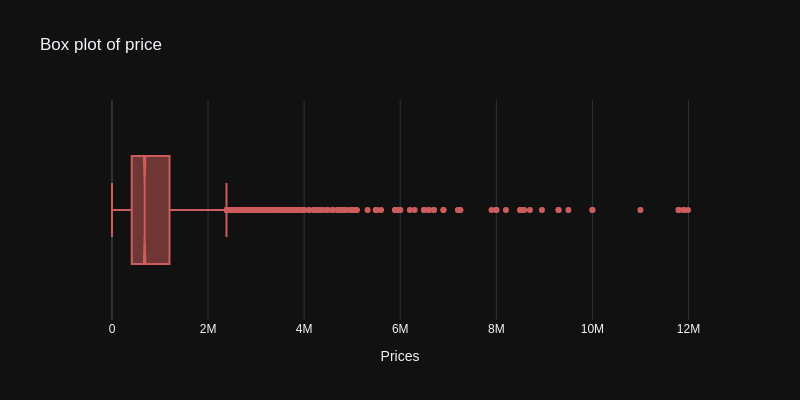

In [ ]:
fig = px.box(x = dados.price, notched=True, title="Box plot of price", labels = {'x' : 'Prices'}, color_discrete_sequence=['indianred'])
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')

Ao analisar, foi notado a presença de mais de 70 imóveis com valores menores de 20000. Alguns em lugares em áreas nobres da cidade. Decidi por retirar da análise esse dados.

In [ ]:
dados = dados[dados.price > 20000]

Já o box plot de "square-foot" apresentou uma assimetria bastante anormal. Um dos imóveis continha uma área de 1500000.0 pés quadrados, o que equivale a uma área de aproximadamente 169 campos de futebol. Provavelmente se trata de um erro e foi retirado esse imóvel da análise. Assim como os imóveis que contém uma área igual a zero.

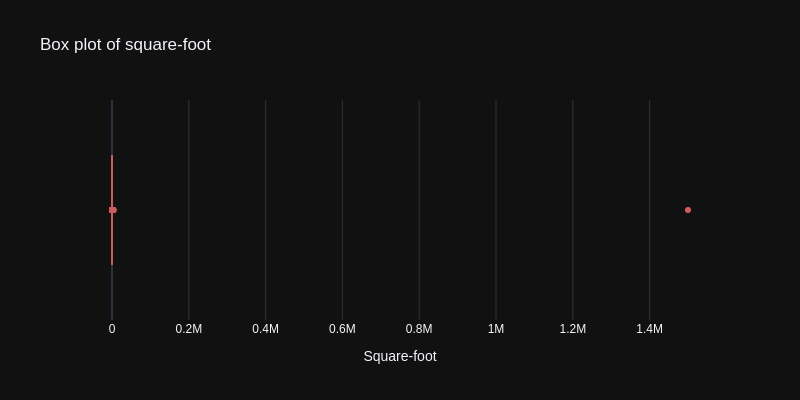

In [ ]:
fig = px.box(x = dados['square-foot'], notched=True, title="Box plot of square-foot", labels = {'x' : 'Square-foot'}, color_discrete_sequence=['indianred'])
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')

In [ ]:
dados['square-foot'].describe()

count    5.371000e+03
mean     4.312982e+02
std      2.046598e+04
min      0.000000e+00
25%      7.500000e+01
50%      1.100000e+02
75%      1.750000e+02
max      1.500000e+06
Name: square-foot, dtype: float64

In [ ]:
dados = dados.query('(`square-foot` != 1500000.0) and (`square-foot` != 0)').copy()

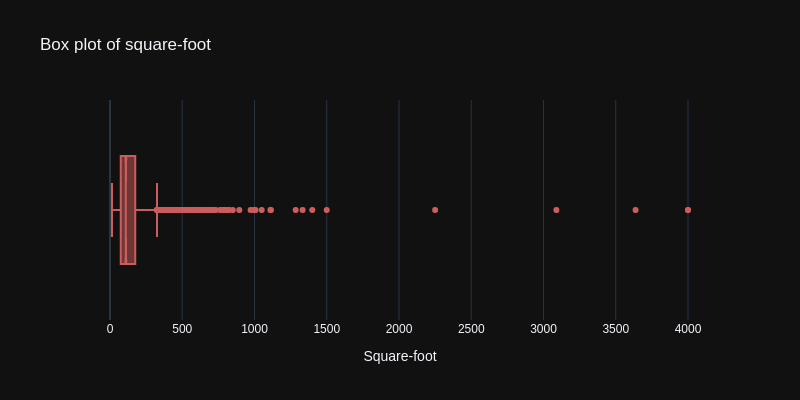

In [ ]:
fig = px.box(x = dados['square-foot'], notched=True, title="Box plot of square-foot", labels = {'x' : 'Square-foot'}, color_discrete_sequence=['indianred'])
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')

A coluna "rooms" apresenta um imóvel de 50 quartos, mas ao pesquisar o endereço descobri que se trata de um hotel. Então não se trata de uma anormalidade.

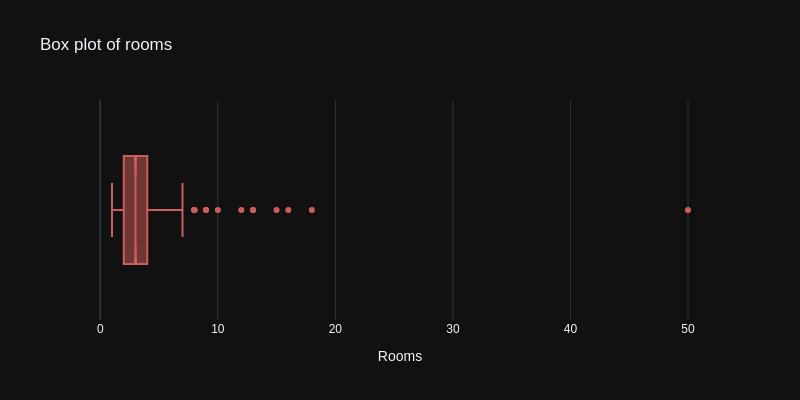

In [ ]:
fig = px.box(x = dados['rooms'], notched=True, title="Box plot of rooms", labels = {'x' : 'Rooms'}, color_discrete_sequence=['indianred'])
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')

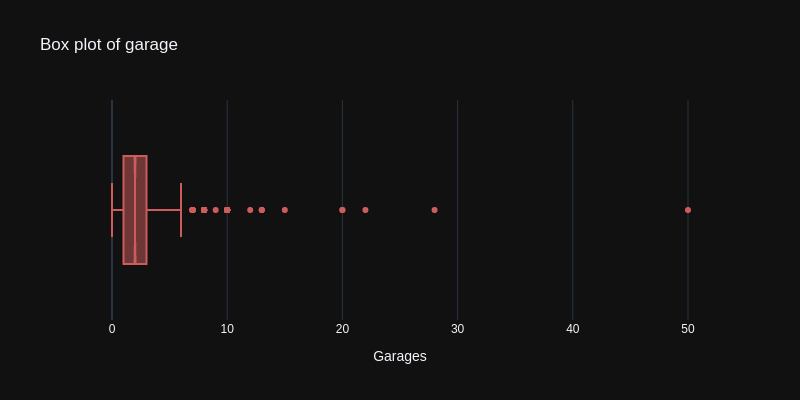

In [ ]:
fig = px.box(x = dados['garage-places'], notched=True, title="Box plot of garage", labels = {'x' : 'Garages'}, color_discrete_sequence=['indianred'])
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')

In [ ]:
dados.sort_values(by = 'garage-places', ascending = False)

,address,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude,zones
1958,"Rua Rubens Caporali Ribeiro, 800",50.0,8500000.0,1.0,4000.0,Buritis,Belo Horizonte,-19.981344,-43.976484,Oeste
2008,Rua Dona Cecília,28.0,1690000.0,4.0,287.0,Serra,Belo Horizonte,-19.937768,-43.922114,Centro-Sul
2816,Rua Carlos Gomes,22.0,752640.0,2.0,82.0,Santo Antônio,Belo Horizonte,-19.943133,-43.945952,Centro-Sul
3671,Rua Serra da Água Quente,20.0,4800000.0,1.0,3637.0,Distrito Industrial Vale do Jatobá,Belo Horizonte,-20.004455,-44.027673,Barreiro
635,"Avenida Santos Dumont, 304",20.0,11790000.0,50.0,3089.0,Centro,Belo Horizonte,-19.914943,-43.941059,Centro-Sul
...,...,...,...,...,...,...,...,...,...,...
2404,Rua Oscar Trompowsky,0.0,410000.0,3.0,100.0,Grajaú,Belo Horizonte,-19.936500,-43.961322,Oeste
4373,Rua Pium,0.0,1850000.0,4.0,164.0,Sion,Belo Horizonte,-19.951487,-43.930124,Centro-Sul
3637,Rua da Bahia,0.0,238000.0,3.0,110.0,Centro,Belo Horizonte,-19.915178,-43.934765,Centro-Sul
3639,"Rua da Bahia, 478",0.0,300000.0,3.0,100.0,Centro,Belo Horizonte,-19.915178,-43.934765,Centro-Sul


O box plot de "garages" apresenta um imóvel com 50 vagas e apenas um quarto. Ao pesquisar o imóvel não localizei nada que poderia ter essas caracteristicas, como um estacionamento. Por isso esse dado foi deletado da análise.

In [ ]:
dados = dados.drop(index = 1820, axis = 0)

Também foi localizado um imóvel com 13 quartos, área de 2250 pés quadrados e apenas 1 vaga de garagem. Tem alta chance de se tratar de um erro de entrada, por isso também foi deletado da análise.

In [ ]:
dados.iloc[114,:]

address          Rua Císsus, 148 
garage-places                 1.0
price                   4200000.0
rooms                        13.0
square-foot                2250.0
neighborhood              Juliana
city               Belo Horizonte
latitude               -19.809608
longitude              -43.944296
zones                       Norte
Name: 119, dtype: object

In [ ]:
dados = dados.drop(index = 114, axis = 0)

Para terminar resta apenas fazer a exportação dos dados:

In [ ]:
from google.colab import files
dados.to_csv('dados_tratados.csv', index = False, sep = ',', encoding = 'UTF-8') 